In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
# Load dataset
df = pd.read_csv('dataset_mood_smartphone.csv',
                 parse_dates=['time'])

# Filter only the mood rows & rename for convenience
df = df[df['variable']=='mood'] \
       .rename(columns={'time':'timestamp',
                        'value':'mood'})

# Now df has columns ['','id','timestamp','variable','mood']
# and you can drop the unused 'variable' column:
df = df.drop(columns=['variable'])

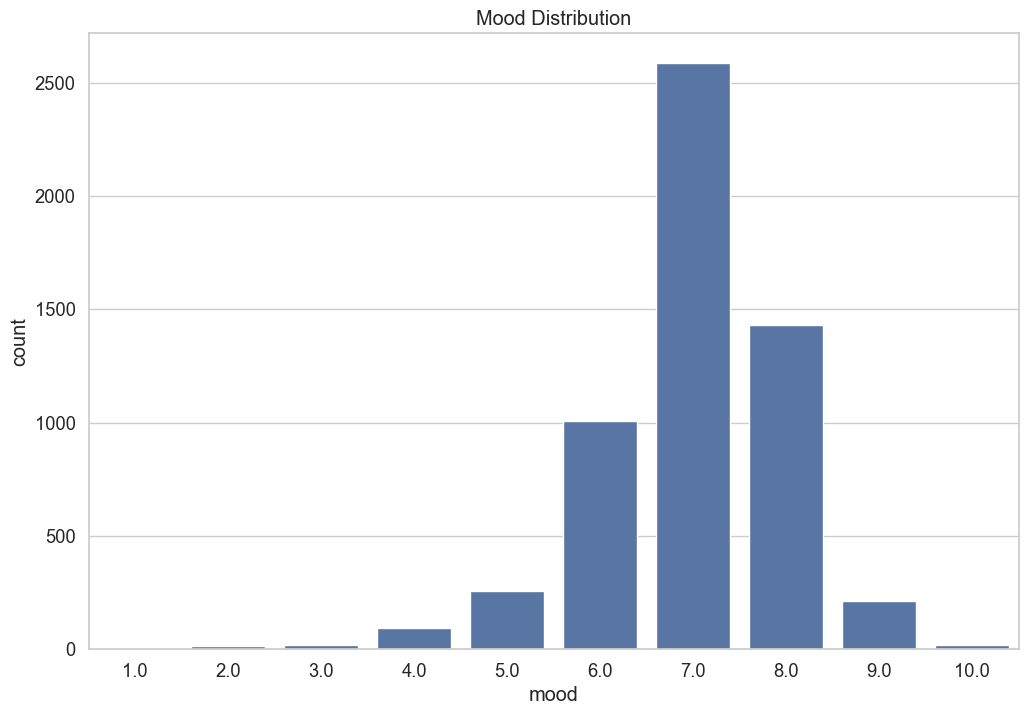

In [44]:
# Mood distribution
sns.countplot(x='mood', data=df)
plt.title('Mood Distribution')
plt.savefig('mood_distribution.pdf')
plt.show()


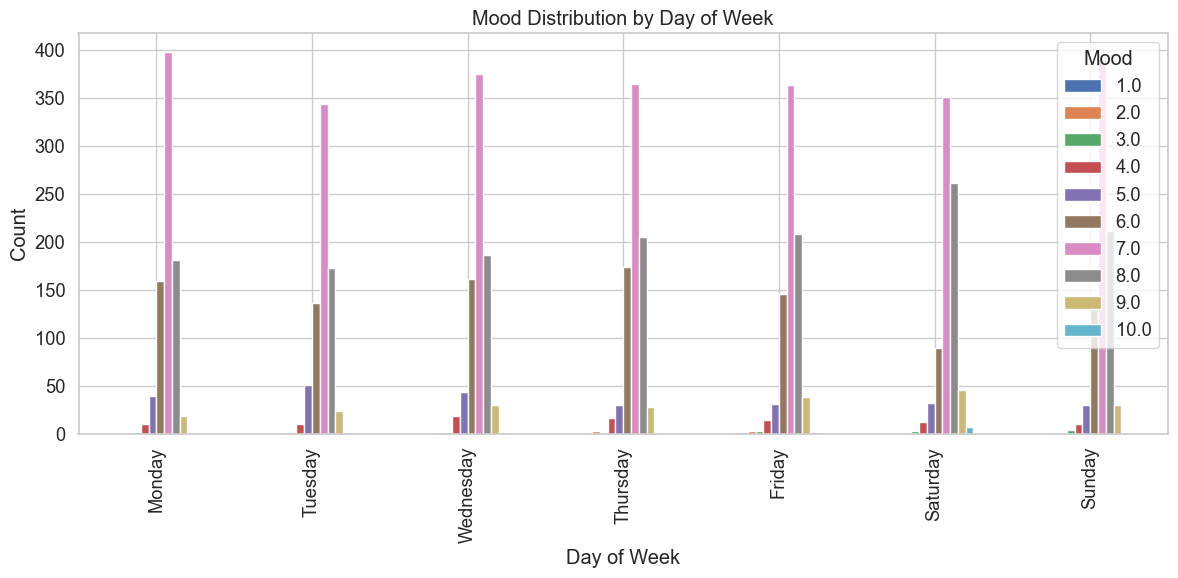

In [46]:
# Mood distribution by weekday
df['weekday'] = df['timestamp'].dt.day_name()
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# count moods per weekday
weekday_counts = (
    df.groupby(['weekday','mood'])
      .size()
      .unstack(fill_value=0)
      .reindex(order)
)

weekday_counts.plot(
    kind='bar',
    figsize=(12,6)
)
plt.title('Mood Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Mood')
plt.tight_layout()
plt.show()

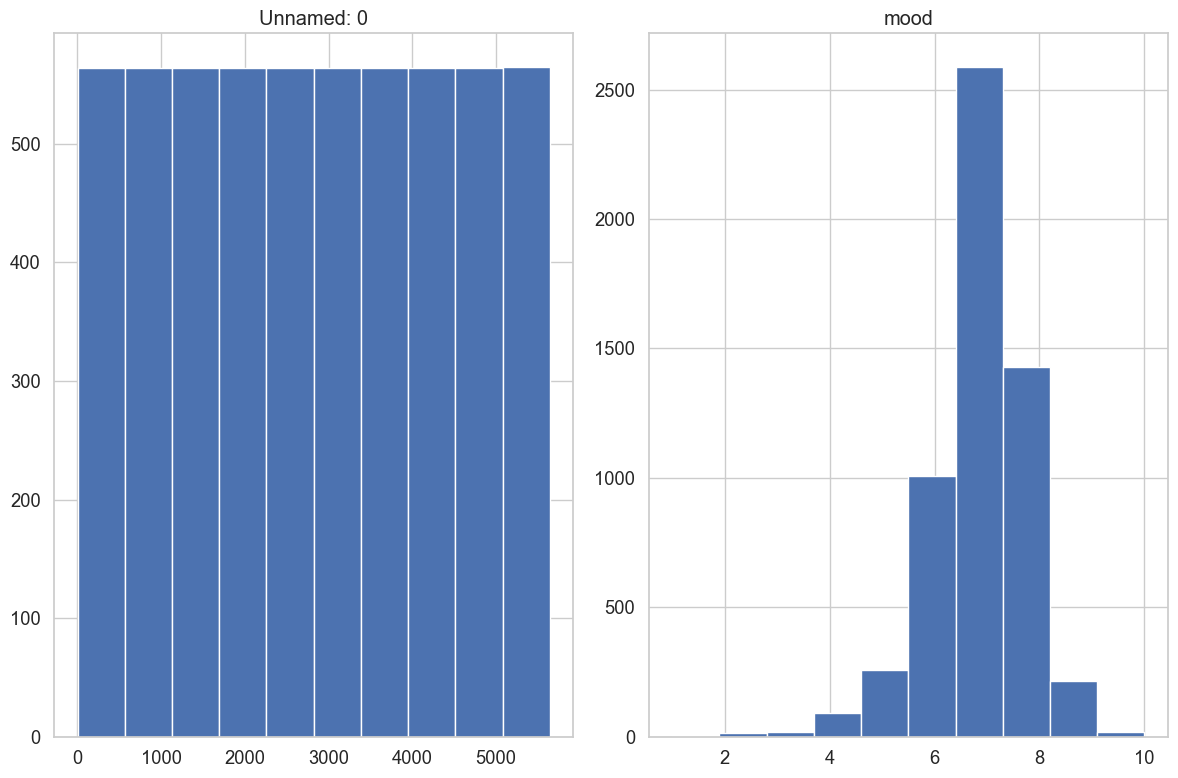

In [40]:
# Distribution of numeric variables
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()


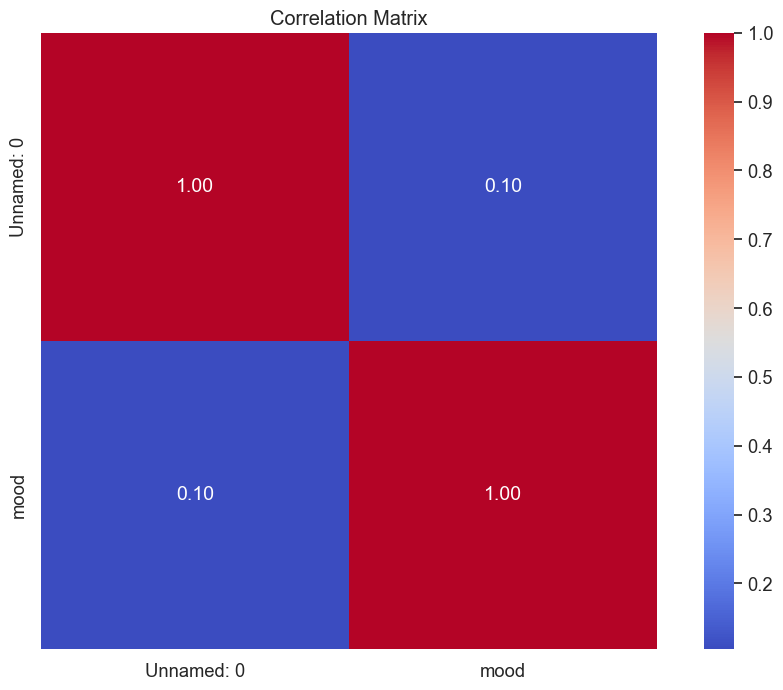

In [41]:
# Correlation matrix
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()
